<a href="https://www.kaggle.com/code/fotimakhongulomova/pytorch-workflow?scriptVersionId=182539119" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# PyTorch Workflow

In [1]:
what_we_covering = {1: "data (preparing and load)", 
                    2: "build model",
                    3: "fitting the model to data (training)",
                    4: "making predictions and evaluting a model (inference)",
                    5: "saving and loading a model",
                    6: "putting it all together"}

what_we_covering

{1: 'data (preparing and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.2'

## 1. Data (preparing and loading)

In [3]:
# Create *known* parameters
weights = 0.7
bias = 0.3

start = 0 
end = 1 
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weights * X + bias

len(X[:10]), len(y[:10])

(10, 10)

### 1. Splitting data into training and test sets 

In [4]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    
    plt.figure(figsize=(10, 7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    # Plot test data in blue
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        # Plot predictions
        plt.scatter(test_data, predictions, c="r", s=4, label="Training data")
        
    # Show the legend
    plt.legend(prop={"size": 14});

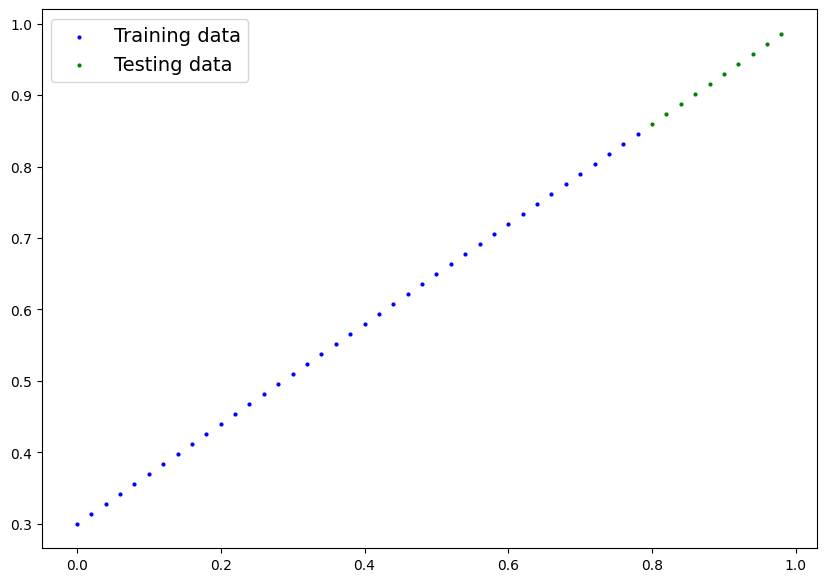

In [6]:
plot_predictions();

### 2. Build a model

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    # Forward method to define the computation
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [8]:
# Create a random seed 
torch.manual_seed(42)

# Create an instance of the model 
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
weights, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check this we can pass it the test data `X_test` to see how closely it predicts y_test.

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined.

Let's make some predictions.

In [11]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

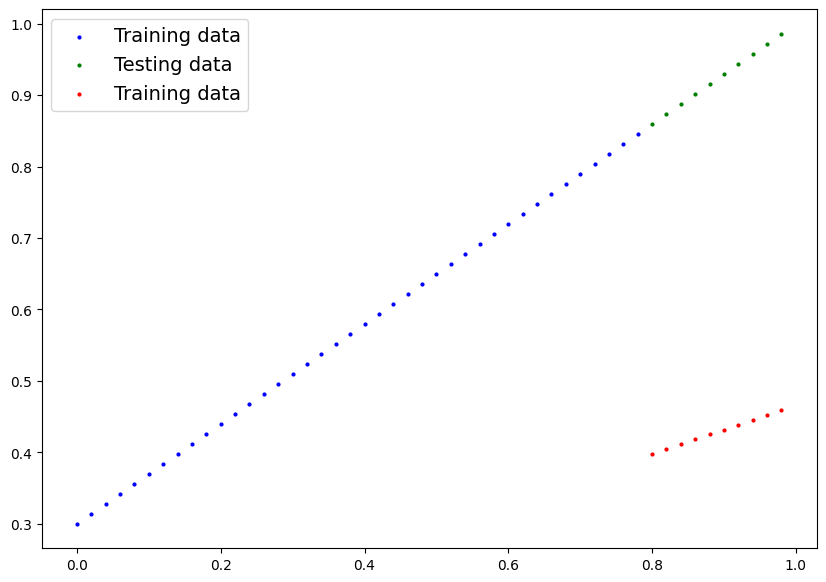

In [12]:
plot_predictions(predictions=y_preds)

## 3. Train model

In [13]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.01)

### Building a training loop (and a testing loop) in PyTorch

In [14]:
torch.manual_seed(42)

epochs = 167

for epoch in range(epochs):
    model_0.train()
    
    # 1. Forwand pass 
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    print(loss)
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()
    
    ### Testing
    model_0.eval()
    
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

        # Print out model state_dict()
        print(model_0.state_dict())

tensor(0.3129, grad_fn=<MeanBackward0>)
Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
tensor(0.3014, grad_fn=<MeanBackward0>)
tensor(0.2898, grad_fn=<MeanBackward0>)
tensor(0.2783, grad_fn=<MeanBackward0>)
tensor(0.2668, grad_fn=<MeanBackward0>)
tensor(0.2553, grad_fn=<MeanBackward0>)
tensor(0.2438, grad_fn=<MeanBackward0>)
tensor(0.2322, grad_fn=<MeanBackward0>)
tensor(0.2207, grad_fn=<MeanBackward0>)
tensor(0.2092, grad_fn=<MeanBackward0>)
tensor(0.1977, grad_fn=<MeanBackward0>)
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
tensor(0.1862, grad_fn=<MeanBackward0>)
tensor(0.1746, grad_fn=<MeanBackward0>)
tensor(0.1631, grad_fn=<MeanBackward0>)
tensor(0.1516, grad_fn=<MeanBackward0>)
tensor(0.1401, grad_fn=<MeanBackward0>)
tensor(0.1285, grad_fn=<MeanBackward0>)
tensor(0.1170, grad_fn=<MeanBackwar

In [15]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6927])), ('bias', tensor([0.3028]))])

In [17]:
weights, bias

(0.7, 0.3)

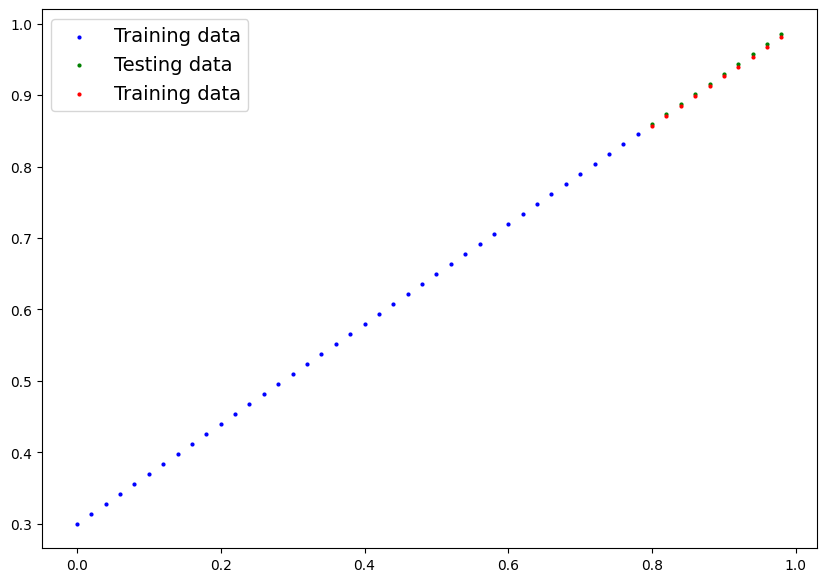

In [18]:
plot_predictions(predictions=y_preds_new)

In [19]:
# 7:01:54